In [1]:
#Mounting Google drive.
from google.colab import drive
drive.mount('/content/gdrive')



Mounted at /content/gdrive


In [2]:
#installing all the required packages.

!pip install --upgrade keras tensorflow
!pip install transformers
!pip install -U PyPDF2
!pip install python-docx
!pip install python-magic
!pip install transformers torch
!pip install sentence-transformers


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 27.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.1/524.1 MB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 105.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.8/440.8 kB 41.9 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.7.1
    Uninstalling typing_extensions-4.7.1:
      Successfully uninstalled typing_extensions-4.7.1
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.12.0
    Uninstalling tensorflow-estimator-2.12.0:
      Successfully uninstalled tensorflow-estimator-2.12.0
  Attempting uninstall: keras
    Found existing installation: keras 2.12.0
    Uninstalling keras-2.12.0:
      Successfully uninstalled keras-2.12.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.12.3
    Uninstalling tensorboard-2.12

In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Purpose:

The code defines a `DocumentManager` class designed to handle and preprocess document data. Its primary functions are:

1. File Type Detection**: Recognizes whether a file is a PDF, DOCX, or TXT based on its extension or content.
2. Reading Files**: Extracts textual content from different file formats.
3. Text Cleaning**: Removes empty lines and consecutive newline characters from the extracted content.
4. Saving Processed Data**: Writes the cleaned text back to an output file.
5. Results Visualization**: Provides a graphical comparison, through a bar chart, of the line counts before and after the cleaning process.

Upon execution, the script processes a document from a specified path, cleans the content, saves the cleaned text, and visualizes the cleaning results.

In [4]:
# Importing necessary libraries and modules
import pandas as pd
import numpy as np
import re
from PyPDF2 import PdfReader
import os
import docx
import magic
import matplotlib.pyplot as plt

# File paths
BASE_PATH = "/content/gdrive/MyDrive/HotelAssist"
OUTPUT_FILE = "/content/gdrive/MyDrive/HotelAssist"

# Class to manage document operations and preprocessing
class DocumentManager:
    def __init__(self, base_path):
        """Initialize the DocumentManager with a base path."""
        self.base_path = base_path

    def detect_file_type(self, file_path):
        """Detect file type based on its content using python-magic and file extension."""
        file_extension = os.path.splitext(file_path)[1].lower()

        # Identifying file type based on extension
        if file_extension == '.pdf':
            return "application/pdf"
        elif file_extension == '.docx':
            return "application/vnd.openxmlformats-officedocument.wordprocessingml.document"
        elif file_extension == '.txt':
            return "text/plain"

        # If extension doesn't match known types, use python-magic for detection
        return magic.from_file(file_path, mime=True)

    def read_pdf(self, file_path):
        """Read a PDF file and extract text."""
        try:
            with open(file_path, "rb") as file:
                pdf_reader = PdfReader(file)
                text = "".join(page.extract_text() for page in pdf_reader.pages)
            return text
        except Exception as e:
            print(f"Error reading PDF {file_path}: {e}")
            raise e

    def read_word(self, file_path):
        """Read a DOCX file and extract text."""
        try:
            doc = docx.Document(file_path)
            text = "\n".join(paragraph.text for paragraph in doc.paragraphs)
            return text
        except Exception as e:
            print(f"Error reading DOCX {file_path}: {e}")
            raise e

    def read_txt(self, file_path):
        """Read a TXT file."""
        try:
            with open(file_path, "r") as file:
                return file.read()
        except Exception as e:
            print(f"Error reading TXT {file_path}: {e}")
            raise e

    def compile_documents(self):
        """Compile document contents from the base path and return cleaned text."""
        file_type = self.detect_file_type(self.base_path)

        # Reading content based on detected file type
        if file_type == "application/pdf":
            content = self.read_pdf(self.base_path)
        elif file_type == "application/vnd.openxmlformats-officedocument.wordprocessingml.document":
            content = self.read_word(self.base_path)
        elif file_type == "text/plain":
            content = self.read_txt(self.base_path)
        else:
            raise ValueError(f"Unsupported file type: {file_type}")

        # Clean the document content
        formatted_content = self.clean_and_format_text(content)

        return formatted_content

    def clean_and_format_text(self, text):
        """Clean the document's text by removing empty lines and repeated newlines."""
        # Split the text into lines
        lines = text.splitlines()

        # Count lines before cleaning
        self.before_count = len(lines)

        # Filter out lines that only contain whitespace
        cleaned_lines = [line for line in lines if line.strip() != ""]

        # Count lines after cleaning
        self.after_count = len(cleaned_lines)

        # Join cleaned lines and replace consecutive newlines with a single newline
        formatted_text = "\n".join(cleaned_lines)
        formatted_text = re.sub(r'\n+', '\n', formatted_text).strip()

        return formatted_text

    def save_to_file(self, output_path):
        """Write cleaned document content to a file."""
        text_data = self.compile_documents()
        try:
            with open(output_path, "w") as f:
                f.write(text_data)
        except Exception as e:
            print(f"Error saving to file {output_path}: {e}")
            raise e

    def plot_results(self):
        """Plot bar graph showing count of lines before and after cleaning."""
        plt.bar(['Before Cleaning', 'After Cleaning'], [self.before_count, self.after_count],color=['red', 'blue'])
        plt.title('Number of Records Before and After Cleaning')
        plt.ylabel('Number of Records')
        plt.show()

# Main execution
if __name__ == '__main__':
    # Instantiate DocumentManager and process the document
    doc_manager = DocumentManager(BASE_PATH)
    doc_manager.save_to_file(OUTPUT_FILE)
    print(f"Total Records Before Cleaning: {doc_manager.before_count}")
    print(f"Total Records After Cleaning: {doc_manager.after_count}")
    doc_manager.plot_results()


# Purpose

The script cleans chatbot datasets by performing the following:

1. Dataset Read**: Extracts user-bot conversation pairs from the dataset.
2. Validity Checks**: Ensures patterns and responses contain words; discards invalid entries.
3. Semantic Relevance**: Uses a BERT model to verify the semantic relevance between user inputs and bot responses.
4. Duplicate Removal**: Deletes repeated conversation pairs.
5. Data Writing**: Stores the cleaned data in a user-bot format.
6. Data Comparison**: Contrasts the sizes of the original and cleaned datasets.

Upon execution, the script refines chatbot training data, emphasizing syntactic correctness and semantic meaning.

In [5]:
"""
Chatbot Dataset Cleaner
Semantic Filtering of User-Bot Conversations
"""
import json
import re
import numpy as np
import nltk
import torch
from sentence_transformers import SentenceTransformer, util

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Set the base path for the dataset and the output file location
BASE_PATH = "/content/gdrive/MyDrive/HotelAssist"
OUTPUT_FILE = "/content/gdrive/MyDrive/HotelAssist"

class DataCleaner:
    @staticmethod
    def is_valid_pattern(pattern):
        """Check if the pattern contains at least one word."""
        return len(pattern.strip()) > 0

    @staticmethod
    def is_valid_response(response):
        """Check if the response contains at least one word."""
        return len(response.strip()) > 0

    @staticmethod
    def batch_is_semantically_relevant(batch_patterns, batch_responses):
        """
        Determine if batches of patterns and responses are semantically relevant.
        Uses a pre-trained model to check for semantic similarity.
        """
        model = SentenceTransformer('bert-base-nli-mean-tokens')
        pattern_embeddings = model.encode(batch_patterns)
        response_embeddings = model.encode(batch_responses)
        similarity_scores = util.pytorch_cos_sim(pattern_embeddings, response_embeddings)
        similarity_threshold = 0.6
        return (similarity_scores >= similarity_threshold).any(dim=1).tolist()

    @classmethod
    def clean_data(cls, dataset_path):
        """Process and clean the dataset by filtering semantically irrelevant and duplicate pairs."""

        # Load the data from the specified path
        with open(dataset_path, 'r') as file:
            lines = file.readlines()
            patterns = [lines[i+1].strip() for i in range(0, len(lines), 2)]
            responses = [lines[i].strip() for i in range(0, len(lines), 2)]

        # Validate patterns and responses
        patterns = [pattern.split(': ')[1] for pattern in patterns if cls.is_valid_pattern(pattern)]
        responses = [response.split(': ')[1] for response in responses if cls.is_valid_response(response)]

        # Remove duplicates
        unique_pairs = list(set(zip(patterns, responses)))
        patterns = [item[0] for item in unique_pairs]
        responses = [item[1] for item in unique_pairs]

        # Filter out non-semantically relevant pairs
        filtered_patterns, filtered_responses = [], []
        for pattern, response in zip(patterns, responses):
            is_relevant = cls.batch_is_semantically_relevant([pattern], [response])
            if is_relevant[0]:
                filtered_patterns.append(pattern)
                filtered_responses.append(response)

        # Convert data to alternate user-bot format
        cleaned_data = []
        for p, r in zip(filtered_patterns, filtered_responses):
            cleaned_data.append(f"User: {p}\nBot: {r}\n")

        # Save the cleaned data
        with open("/content/gdrive/MyDrive/Final/Immigration/data.txt", 'w') as outfile:
            outfile.writelines(cleaned_data)

        return 'train.txt'

    @staticmethod
    def compare_data(original_file, cleaned_file):
        """Compare the number of patterns and responses between original and cleaned data files."""

        # Load the original and cleaned files
        with open(original_file, 'r') as orig_file:
            original_lines = orig_file.readlines()
        with open(cleaned_file, 'r') as cleaned_file:
            cleaned_lines = cleaned_file.readlines()

        # Print the number of lines in each file for comparison
        print("Number of lines in original file:", len(original_lines))
        print("Number of lines in cleaned file:", len(cleaned_lines))

def main():
    dataset_path = "/content/gdrive/MyDrive/HotelAssist"

    # Clean the data and save the cleaned version
    cleaned_file = DataCleaner.clean_data(dataset_path)

    # Compare the original and cleaned datasets
    DataCleaner.compare_data(dataset_path, cleaned_file)

# Entry point of the script
if __name__ == "__main__":
    main()



# Text Data Preprocessing for Chatbots

1. Library Imports**: Essential libraries for data handling, regular expressions, deep learning, and storage are imported.
  
2. GPU Check**: It checks if TensorFlow can access a GPU for efficient processing.

3. Data Preprocessing Class (ChatbotDataPreprocessor)**:
    - Initialization**: Set parameters like paths, maximum vocabulary size, sequence length, and initializes a tokenizer.
    - Data Loading**: Reads dialogues from a provided file.
    - Text Cleaning**: Converts text to lowercase and removes unwanted characters.
    - Dialogue Pair Creation**: Parses and segregates user and bot dialogues.
    - Tokenization & Padding**: Converts texts into numeric sequences and pads them for uniform length.
    - Storing Data**: Serializes and saves the tokenizer and the preprocessed sequences to designated files.

4. Script Execution**: The main execution script initializes the preprocessor with a specific data file path and initiates the preprocessing. The processed data, along with the tokenizer, is saved in specified paths for further use in model training and inference.




In [6]:
# TEXT DATA PREPROCESSING:

import re
import pickle
import tensorflow as tf
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from google.colab import drive

# Check if TensorFlow can access a GPU
if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("Please install GPU version of TensorFlow")

# Class to preprocess chatbot data
class ChatbotDataPreprocessor:
    def __init__(self, base_path, filepath, max_vocab=50000, max_seq_len=200):
        # Initialize key parameters, paths, and tokenizer
        self.filepath = filepath
        self.max_vocab = max_vocab
        self.max_seq_len = max_seq_len
        self.base_path = base_path
        self.TOKENIZER_PATH = self.base_path + "tokenizer.pkl"
        self.SEQUENCES_PATH = self.base_path + "preprocessed_data.pkl"
        self.tokenizer = Tokenizer(num_words=self.max_vocab, oov_token='<OOV>', filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n')
        self.questions = []
        self.answers = []

    # Load dialogue data from the provided file
    def load_data(self):
        try:
            with open(self.filepath, 'r') as file:
                lines = file.readlines()
            if not lines:
                print("Warning: Loaded data is empty.")
                return []
            return lines
        except Exception as e:
            print(f"Error loading data from {self.filepath}: {e}")
            return []

    # Clean the text: convert to lowercase and remove non-alphanumeric characters
    def clean_text(self, text):
        text = text.lower().strip()
        text = re.sub(r"[^a-z0-9'\s]+", " ", text)
        return text

    # Parse the loaded lines to extract and clean question and answer pairs
    def create_dialogue_pairs(self, lines):
        questions_temp = []
        answers_temp = []
        for index, line in enumerate(lines):
            if "User:" in line:
                questions_temp.append(self.clean_text(line.replace("User:", "")))
            elif "Bot:" in line:
                answers_temp.append(self.clean_text(line.replace("Bot:", "")))

        # Ensure we have equal number of questions and answers
        min_len = min(len(questions_temp), len(answers_temp))
        self.questions = questions_temp[:min_len]
        self.answers = answers_temp[:min_len]
        if len(questions_temp) != len(answers_temp):
            print("Warning: Number of questions and answers don't match! Truncated to match lengths.")

    # Convert list of texts to tokenized sequences and then pad them
    def tokenize_and_pad(self, texts):
        sequences = self.tokenizer.texts_to_sequences(texts)
        padded = pad_sequences(sequences, maxlen=self.max_seq_len, padding='post')
        return padded

    # Serialize and save the tokenizer object
    def save_tokenizer(self, filename):
        try:
            with open(filename, 'wb') as file:
                pickle.dump(self.tokenizer, file)
            print(f"Tokenizer saved successfully to {filename}.")
        except Exception as e:
            print(f"Error saving tokenizer to {filename}: {e}")

    # Serialize and save the tokenized and padded sequences
    def save_sequences(self, filename, train_q, test_q, train_a, test_a):
        try:
            with open(filename, 'wb') as file:
                pickle.dump({
                    'train_questions': train_q,
                    'test_questions': test_q,
                    'train_answers': train_a,
                    'test_answers': test_a,
                    'tokenizer': self.tokenizer
                }, file)
            print(f"Sequences saved successfully to {filename}.")
        except Exception as e:
            print(f"Error saving sequences to {filename}: {e}")

    # Main preprocessing steps: Load, clean, tokenize, split, and save data
    def preprocess(self):
        lines = self.load_data()
        if not lines:
            return
        self.create_dialogue_pairs(lines)
        self.tokenizer.fit_on_texts(self.questions + self.answers)
        self.tokenizer.word_index['<pad>'] = 0

        train_q, test_q, train_a, test_a = train_test_split(self.questions, self.answers, test_size=0.2)
        train_q = self.tokenize_and_pad(train_q)
        test_q = self.tokenize_and_pad(test_q)
        train_a = self.tokenize_and_pad(train_a)
        test_a = self.tokenize_and_pad(test_a)

        self.save_tokenizer(self.TOKENIZER_PATH)
        self.save_sequences(self.SEQUENCES_PATH, train_q, test_q, train_a, test_a)

# Script execution starts here
if __name__ == "__main__":
    BASE_PATH = "/content/gdrive/MyDrive/HotelAssist/"
    FILE_PATH = BASE_PATH + "data.txt"

    # Initialize the preprocessor and begin the preprocessing
    preprocessor = ChatbotDataPreprocessor(BASE_PATH, filepath=FILE_PATH)
    preprocessor.preprocess()


In [7]:
import pickle

def load_tokenizer(filename):
    """
    Load a saved tokenizer from a given file.

    Parameters:
    - filename (str): Path to the tokenizer file to be loaded.

    Returns:
    - tokenizer: Loaded tokenizer object or None if there's an error.
    """
    try:
        with open(filename, 'rb') as file:
            tokenizer = pickle.load(file)
        print(f"Tokenizer loaded successfully from {filename}.")
        return tokenizer
    except Exception as e:
        print(f"Error loading tokenizer from {filename}: {e}")
        return None

def analyze_tokens(tokenizer):
    """
    Analyze and print details from the tokenizer like unique token count,
    highest and lowest token values, top and bottom frequent tokens.

    Parameters:
    - tokenizer: Tokenizer object to be analyzed.
    """
    # Number of unique tokens
    num_tokens = len(tokenizer.word_index)
    print(f"Number of unique tokens: {num_tokens}")

    # Highest and Lowest values
    print(f"Highest token value: {max(tokenizer.word_index.values())}")
    print(f"Lowest token value: {min(tokenizer.word_index.values())}")

    # Sorting the word counts in descending order to get most and least frequent tokens
    sorted_word_count = sorted(tokenizer.word_counts.items(), key=lambda item: item[1], reverse=True)

    # Top 10 most frequent tokens
    print("\nTop 10 most frequent tokens:")
    for word, count in sorted_word_count[:10]:
        print(f"'{word}': {count}")

    # Bottom 10 least frequent tokens
    print("\nBottom 10 least frequent tokens:")
    for word, count in sorted_word_count[-10:]:
        print(f"'{word}': {count}")

if __name__ == "__main__":
    # Defining base path for loading the tokenizer
    BASE_PATH = "/content/gdrive/MyDrive/HotelAssist/"
    TOKENIZER_PATH = BASE_PATH + "tokenizer.pkl"

    # Loading tokenizer and analyzing it if loading was successful
    tokenizer = load_tokenizer(TOKENIZER_PATH)
    if tokenizer:
        analyze_tokens(tokenizer)


Tokenizer loaded successfully from /content/gdrive/MyDrive/HotelAssist/tokenizer.pkl.
Number of unique tokens: 4448
Highest token value: 4447
Lowest token value: 0

Top 10 most frequent tokens:
'and': 8773
'or': 8358
'toronto': 8018
'the': 7653
'can': 7365
'a': 7160
'for': 6947
'vegetarian': 6708
'in': 6562
'to': 5981

Bottom 10 least frequent tokens:
'warehouse': 1
'whirlpools': 1
'advice': 1
'aerobic': 1
'outdoors': 1
'sunbeds': 1
'visual': 1
'copy': 1
'havefacilities': 1
'diningoptions': 1


# Analysis of Token Frequencies in Chatbot Dataset
### Understanding word frequencies can help in refining the dataset. If some crucial words related to the chatbot's purpose are missing or are less frequent, they can be added or emphasized.
#### Words that appear with extremely high frequency but are not relevant to the chatbot's function might be indicative of "noise" and can be evaluated for importance.
#### The word cloud, in particular, offers an intuitive way to understand the primary themes of the dataset at a glance.

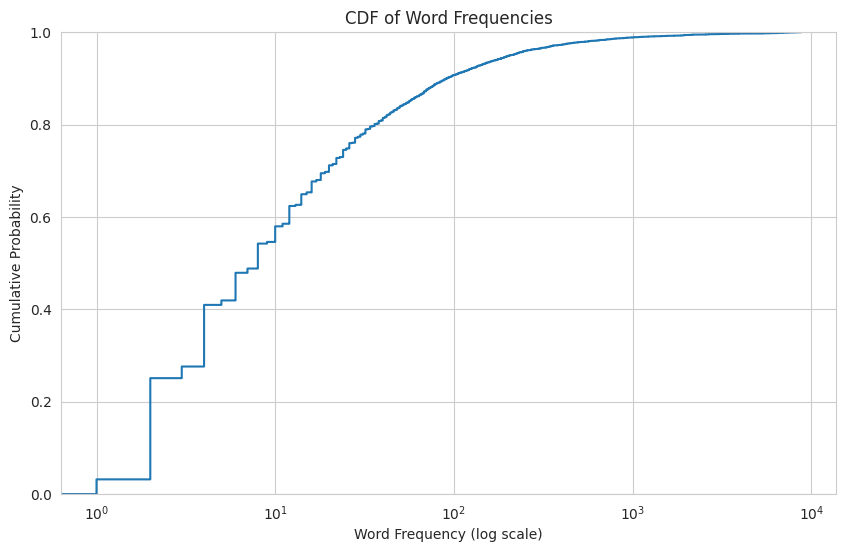

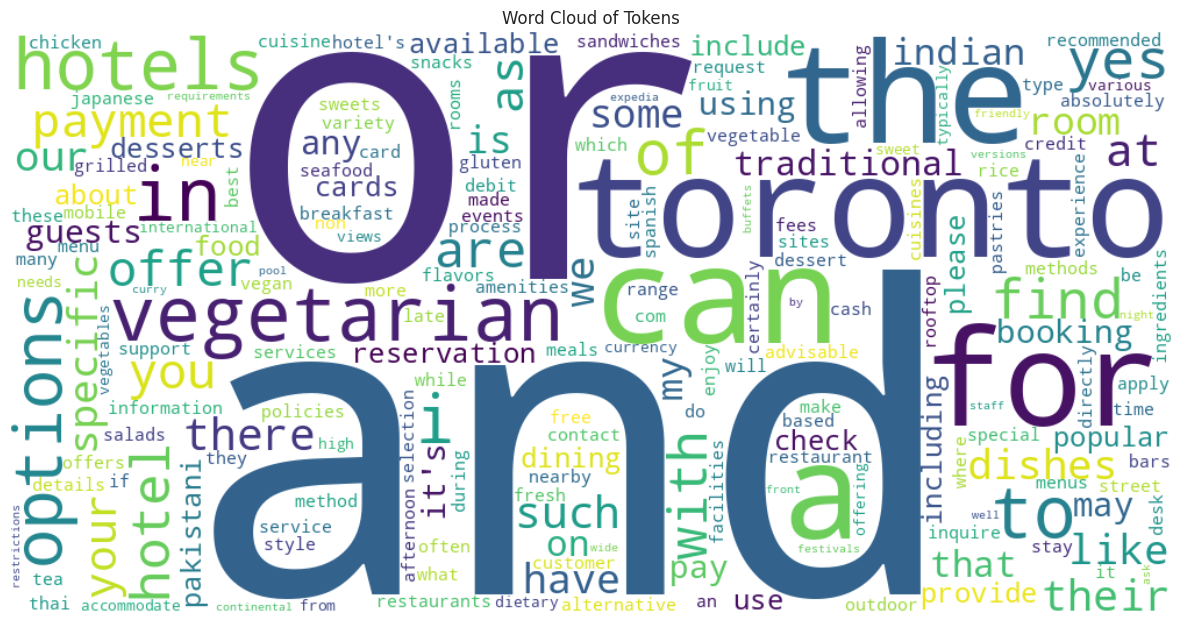

In [8]:
# !pip install seaborn wordcloud

import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# 1. Load the tokenizer
# Open the tokenizer file in read-binary mode and load the tokenizer object into memory
with open("/content/gdrive/MyDrive/HotelAssist/tokenizer.pkl", "rb") as file:
    tokenizer = pickle.load(file)

# 2. Extract word frequencies
# The word_counts attribute of the tokenizer contains a dictionary with words as keys and their respective frequencies as values.
# Convert these frequencies to a list for plotting.
word_freqs = list(tokenizer.word_counts.values())
word_freqs_sorted = sorted(word_freqs, reverse=True)

# 3. Plot the CDF using seaborn
# Setting up plot aesthetics
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

# The ecdfplot function from seaborn plots the empirical cumulative distribution function of word frequencies.
sns.ecdfplot(word_freqs_sorted)

# Using a log scale for x-axis to better visualize the wide range of word frequencies
plt.xscale('log')

# Labeling axes and giving the plot a title
plt.xlabel('Word Frequency (log scale)')
plt.ylabel('Cumulative Probability')
plt.title('CDF of Word Frequencies')
plt.show()

# 4. Plot the Word Cloud
# The WordCloud library allows us to visualize word frequencies in a cloud format.
# Words with higher frequencies appear larger in the cloud.
wordcloud = WordCloud(width = 1000, height = 500, background_color ='white').generate_from_frequencies(tokenizer.word_counts)

# Setting up the plot size and displaying the word cloud
plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation='bilinear')

# Removing the axis to make the plot look cleaner
plt.axis('off')
plt.title('Word Cloud of Tokens')
plt.show()


In [9]:
#check the result from above preprocessing.

BASE_PATH = "/content/gdrive/MyDrive/HotelAssist/"
with open(BASE_PATH + "preprocessed_data.pkl", "rb") as file:
    preprocessed_data = pickle.load(file)

print(preprocessed_data.keys())


dict_keys(['train_questions', 'test_questions', 'train_answers', 'test_answers', 'tokenizer'])


In [10]:
#checking the fiels and basepath access
import os

BASE_PATH = "/content/gdrive/MyDrive/HotelAssist/"

# Check if BASE_PATH exists
if not os.path.exists(BASE_PATH):
    raise ValueError(f"The directory {BASE_PATH} does not exist!")
else:
    print(f"{BASE_PATH} exists.")
    # List and print existing files inside BASE_PATH
    files_in_directory = os.listdir(BASE_PATH)
    if files_in_directory:
        print("Files inside the directory:")
        for file in files_in_directory:
            print(file)
    else:
        print("The directory is empty.")


/content/gdrive/MyDrive/HotelAssist/ exists.
Files inside the directory:
data.txt
.ipynb_checkpoints
tokenizer.pkl
preprocessed_data.pkl
chatbot_model_best.pth
chatbot_model_final.pth
ImmigrationBot (1).ipynb


# Purpose
1. Import statements:
   - The necessary libraries and modules, like PyTorch, pickle, NumPy, and Matplotlib, are imported for building and training the neural network model.

2. BASE CONFIGURATIONS:
   - Defines basic configurations such as the path to the dataset and the computational device (GPU or CPU).

3. Encoder class:
   - Defines the `Encoder` part of a seq2seq model. It uses an embedding layer followed by an LSTM (with bidirectional support) and dropout.

4. Decoder class:
   - Describes the `Decoder` component of the seq2seq model. Like the encoder, it uses an embedding layer, LSTM, and dropout, but also includes a linear layer for generating predictions.

5. Seq2Seq class:
   - Integrates the `Encoder` and `Decoder` to form the complete sequence-to-sequence architecture. It handles forward propagation, using teacher-forcing optionally.

6. ChatbotTrainer class:
   - Represents the core training mechanism. It does the following:
     - Loads the preprocessed data.
     - Defines utility functions for computing accuracy and handling data collation.
     - Handles training and evaluation of a model over epochs.
     - Provides functionality to visualize training results.

7. EarlyStopping class:
   - Provides an early stopping mechanism to halt training if the validation loss doesn't improve over a certain number of epochs, potentially saving training time and preventing overfitting.

8. SCRIPT/MAIN block:
   - This is where the actual execution starts if the script is run directly:
     - Configurations for training, like batch size, embedding dimension, etc., are set.
     - The early stopping mechanism is initialized.
     - An instance of the `ChatbotTrainer` is created.
     - The dataset is split into training and validation sets.
     - The seq2seq model (encoder + decoder) is initialized.
     - The optimizer, loss criterion, and learning rate scheduler are defined.
     - The model is trained using the configurations and utilities defined above.
     - Training and validation results (losses and accuracies over epochs) are visualized.

In essence, the provided script is designed to train a chatbot using a sequence-to-sequence (seq2seq) architecture. The chatbot learns to generate responses based on input sequences, and utilities like early stopping and learning rate adjustments are employed for efficient and effective training. The results are then visualized to monitor the model's performance over the epochs.

In [11]:
!pip freeze > requirements.txt


In [12]:
# Bot training using seq2seq modelling.
import torch
import torch.nn as nn
import torch.optim as optim
import pickle
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from torch.nn.utils.rnn import pad_sequence
from keras.callbacks import EarlyStopping
from torch.utils.data import random_split
import numpy as np

# BASE CONFIGURATIONS
BASE_PATH = "/content/gdrive/MyDrive/HotelAssist/"
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ENCODER
class Encoder(nn.Module):
    """Encoder module for the Seq2Seq model."""
    def __init__(self, input_dim, emb_dim, hid_dim, n_layers, dropout):
        super().__init__()
        self.embedding = nn.Embedding(input_dim, emb_dim)
        self.rnn = nn.LSTM(emb_dim, hid_dim, n_layers, dropout=dropout, bidirectional=True)
        self.dropout = nn.Dropout(dropout)

    def forward(self, src):
        embedded = self.dropout(self.embedding(src))
        outputs, (hidden, cell) = self.rnn(embedded)
        return hidden, cell

# DECODER
class Decoder(nn.Module):
    """Decoder module for the Seq2Seq model."""
    def __init__(self, output_dim, emb_dim, hid_dim, n_layers, dropout):
        super().__init__()
        self.output_dim = output_dim
        self.embedding = nn.Embedding(output_dim, emb_dim)
        self.rnn = nn.LSTM(emb_dim, hid_dim * 2, n_layers, dropout=dropout)
        self.fc_out = nn.Linear(hid_dim * 2, output_dim)
        self.dropout = nn.Dropout(dropout)

    def forward(self, input, hidden, cell):
        input = input.unsqueeze(0)
        embedded = self.dropout(self.embedding(input))
        output, (hidden, cell) = self.rnn(embedded, (hidden, cell))
        prediction = self.fc_out(output.squeeze(0))
        return prediction, hidden, cell

# SEQ2SEQ MODEL
class Seq2Seq(nn.Module):
    """Main Seq2Seq model integrating the Encoder and Decoder."""
    def __init__(self, encoder, decoder, device):
        super().__init__()
        self.encoder = encoder
        self.decoder = decoder
        self.device = device

    def forward(self, src, trg, teacher_forcing_ratio=0.5):
        trg_len = trg.shape[0]
        batch_size = trg.shape[1]
        trg_vocab_size = self.decoder.output_dim
        outputs = torch.zeros(trg_len, batch_size, trg_vocab_size).to(self.device)
        encoder_hidden, encoder_cell = self.encoder(src)

        if self.encoder.rnn.bidirectional:
            hidden = torch.cat((encoder_hidden[0:encoder_hidden.size(0):2],
                                encoder_hidden[1:encoder_hidden.size(0):2]), dim=2)
            cell = torch.cat((encoder_cell[0:encoder_cell.size(0):2],
                              encoder_cell[1:encoder_cell.size(0):2]), dim=2)
        else:
            hidden, cell = encoder_hidden, encoder_cell

        input = trg[0]

        for t in range(1, trg_len):
            output, hidden, cell = self.decoder(input, hidden, cell)
            outputs[t] = output
            teacher_force = torch.rand(1).item() < teacher_forcing_ratio
            top1 = output.argmax(1)
            input = trg[t] if teacher_force else top1

        return outputs

# CHATBOT TRAINER
class ChatbotTrainer:
    def __init__(self, data_path,tokenizer):
        self.data_path = data_path
        with open(data_path, "rb") as file:
            preprocessed_data = pickle.load(file)
        # self.tokenizer = preprocessed_data['tokenizer']
        self.tokenizer = tokenizer
        self.questions = preprocessed_data['train_questions']
        self.answers = preprocessed_data['train_answers']
        self.input_dim = len(self.tokenizer.word_index) + 1
        self.output_dim = len(self.tokenizer.word_index) + 1
        self.train_losses = []
        self.val_losses = []
        self.train_accuracies = []
        self.val_accuracies = []

    @staticmethod
    def _accuracy(preds, y):
        """Returns accuracy per batch."""
        _, predictions = torch.max(preds, 1)
        correct = (predictions == y).float()
        acc = correct.sum() / len(correct)
        return acc

    @staticmethod
    def _collate_fn(data):
        data.sort(key=lambda x: len(x[0]), reverse=True)
        src_seqs, trg_seqs = zip(*data)
        src_seqs = [torch.Tensor(s) for s in src_seqs]
        trg_seqs = [torch.Tensor(t) for t in trg_seqs]
        src_lengths = [len(s) for s in src_seqs]
        PAD_IDX = tokenizer.word_index['<pad>']  # Using <pad> token for padding
        # PAD_IDX = self.tokenizer.word_index['<pad>']
        src_padded = pad_sequence(src_seqs, padding_value=PAD_IDX, batch_first=True)
        trg_lengths = [len(t) for t in trg_seqs]
        trg_padded = pad_sequence(trg_seqs, padding_value=PAD_IDX, batch_first=True)
        return src_padded, src_lengths, trg_padded, trg_lengths

    def _train_epoch(self, model, dataloader, optimizer, criterion, clip, teacher_forcing_ratio):
        model.train()
        epoch_loss = 0
        epoch_acc = 0
        for i, (src, _, trg, _) in enumerate(dataloader):
            src, trg = src.long().to(DEVICE), trg.long().to(DEVICE)
            optimizer.zero_grad()
            output = model(src, trg, teacher_forcing_ratio)
            output_dim = output.shape[-1]
            output = output[1:].reshape(-1, output_dim)
            trg = trg[1:].reshape(-1)
            loss = criterion(output, trg)
            acc = self._accuracy(output, trg)
            loss.backward()
            torch.nn.utils.clip_grad_norm_(model.parameters(), clip)
            optimizer.step()
            epoch_loss += loss.item()
            epoch_acc += acc.item()
        return epoch_loss / len(dataloader), epoch_acc / len(dataloader)

    def _evaluate(self, model, dataloader, criterion):
        model.eval()
        epoch_loss = 0
        epoch_acc = 0
        with torch.no_grad():
            for i, (src, _, trg, _) in enumerate(dataloader):
                src, trg = src.long().to(DEVICE), trg.long().to(DEVICE)
                output = model(src, trg, 0)
                output_dim = output.shape[-1]
                output = output[1:].reshape(-1, output_dim)
                trg = trg[1:].reshape(-1)
                loss = criterion(output, trg)
                acc = self._accuracy(output, trg)
                epoch_loss += loss.item()
                epoch_acc += acc.item()
        return epoch_loss / len(dataloader), epoch_acc / len(dataloader)

    def train(self, model, train_data, valid_data, optimizer, criterion, n_epochs, clip, teacher_forcing_ratio, lr_scheduler):
        best_valid_loss = float('inf')
        epochs_without_improvement = 0  # Initialize the counter
        patience = 3

        for epoch in range(n_epochs):
            train_loss, train_acc = self._train_epoch(model, train_data, optimizer, criterion, clip, teacher_forcing_ratio)
            valid_loss, valid_acc = self._evaluate(model, valid_data, criterion)

            self.train_losses.append(train_loss)
            self.val_losses.append(valid_loss)
            self.train_accuracies.append(train_acc)
            self.val_accuracies.append(valid_acc)

            lr_scheduler.step(valid_loss)

            if valid_loss < best_valid_loss:
                best_valid_loss = valid_loss
                epochs_without_improvement = 0  # Reset the counter
                torch.save(model.state_dict(), BASE_PATH + 'chatbot_model_best.pth')
            else:
                epochs_without_improvement += 1  # Increment the counter

            print(f'Epoch: {epoch + 1:02}')
            print(f'\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc * 100:.2f}%')
            print(f'\t Val. Loss: {valid_loss:.3f} |  Val. Acc: {valid_acc * 100:.2f}%')

            # Check if early stopping criterion is met
            if epochs_without_improvement >= patience:
                print("Early stopping triggered! No improvement for", epochs_without_improvement, "epochs.")
                break  # Stop training

        torch.save(model.state_dict(), BASE_PATH + 'chatbot_model_final.pth')


    def plot_results(self):
        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.plot(self.train_losses, label="Training Loss")
        plt.plot(self.val_losses, label="Validation Loss")
        plt.legend()
        plt.title("Loss vs. Epochs")

        plt.subplot(1, 2, 2)
        plt.plot(self.train_accuracies, label="Training Accuracy")
        plt.plot(self.val_accuracies, label="Validation Accuracy")
        plt.legend()
        plt.title("Accuracy vs. Epochs")
        plt.show()

import numpy as np
import torch

class EarlyStopping:
    def __init__(self, patience=5, verbose=False, delta=0, path='checkpoint.pth', save_model=False):
        """
        Args:
            patience (int): Number of epochs to wait before stopping if no improvement is seen.
            verbose (bool): If True, prints a message for each validation loss improvement.
            delta (float): Minimum change in the validation loss to qualify as an improvement.
            path (str): Path for the checkpoint to be saved to.
            save_model (bool): If True, saves the entire model. Otherwise, only the state dict.
        """
        self.patience = patience
        self.verbose = verbose
        self.counter = 0
        self.best_score = None
        self.early_stop = False
        self.val_loss_min = np.Inf
        self.delta = delta
        self.path = path
        self.save_model = save_model

    def __call__(self, val_loss, model):
        score = -val_loss

        if self.best_score is None:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
        elif score < self.best_score + self.delta:
            self.counter += 1
            if self.verbose:
                print(f'EarlyStopping counter: {self.counter} out of {self.patience}')
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
            self.counter = 0

    def save_checkpoint(self, val_loss, model):
        """Saves model when validation loss decreases."""
        if self.verbose:
            print(f'Validation loss decreased ({self.val_loss_min:.6f} --> {val_loss:.6f}).  Saving model ...')
        if self.save_model:
            torch.save(model, self.path)
        else:
            torch.save(model.state_dict(), self.path)
        self.val_loss_min = val_loss


# --- SCRIPT/MAIN ----
if __name__ == "__main__":
    # Configuration
    BATCH_SIZE = 32
    EMB_DIM = 256
    HID_DIM = 1024
    N_LAYERS = 3
    DROPOUT = 0.3
    N_EPOCHS = 100
    CLIP = 1
    TEACHER_FORCING_RATIO = 0.5
    LEARNING_RATE = 0.001
    train_ratio = 0.8

    with open(BASE_PATH + "preprocessed_data.pkl", "rb") as file:
        preprocessed_data = pickle.load(file)
    tokenizer = preprocessed_data['tokenizer']

    # Initialize the EarlyStopping class
    early_stopping = EarlyStopping(patience=3, verbose=True, path='chatbot_model_early_stopping_checkpoint.pth')

    chatbot_trainer = ChatbotTrainer(data_path=BASE_PATH + "preprocessed_data.pkl", tokenizer=tokenizer)

    # Splitting the dataset
    dataset = list(zip(chatbot_trainer.questions, chatbot_trainer.answers))
    train_size = int(train_ratio * len(dataset))
    valid_size = len(dataset) - train_size
    train_dataset, valid_dataset = random_split(dataset, [train_size, valid_size])

    train_dataloader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, collate_fn=chatbot_trainer._collate_fn)
    valid_dataloader = DataLoader(valid_dataset, batch_size=BATCH_SIZE, shuffle=False, collate_fn=chatbot_trainer._collate_fn)

    # Model Initialization and Training
    enc = Encoder(chatbot_trainer.input_dim, EMB_DIM, HID_DIM, N_LAYERS, DROPOUT).to(DEVICE)
    dec = Decoder(chatbot_trainer.output_dim, EMB_DIM, HID_DIM, N_LAYERS, DROPOUT).to(DEVICE)
    model = Seq2Seq(enc, dec, DEVICE).to(DEVICE)

    optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)
    PAD_IDX = chatbot_trainer.tokenizer.word_index['<pad>']
    criterion = nn.CrossEntropyLoss(ignore_index=PAD_IDX).to(DEVICE)
    lr_scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=3)

    # Train with early stopping
    # chatbot_trainer.train(model, train_dataloader, valid_dataloader, optimizer, criterion, N_EPOCHS, CLIP, TEACHER_FORCING_RATIO, lr_scheduler, early_stopping)
    # chatbot_trainer.train(model, train_dataloader, valid_dataloader, optimizer, criterion, N_EPOCHS, CLIP, TEACHER_FORCING_RATIO, lr_scheduler)
    # chatbot_trainer.plot_results()
    chatbot_trainer.train(model, train_dataloader, valid_dataloader, optimizer, criterion, N_EPOCHS, CLIP, TEACHER_FORCING_RATIO, lr_scheduler)
    chatbot_trainer.plot_results()

In [15]:
# Test the chatbot result
import torch
import pickle
from torch.nn.utils.rnn import pad_sequence
import torch
import torch.nn as nn
import torch.optim as optim
import pickle
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from torch.nn.utils.rnn import pad_sequence
from keras.callbacks import EarlyStopping
from torch.utils.data import random_split
import numpy as np


# ENCODER
class Encoder(nn.Module):
    """Encoder module for the Seq2Seq model."""
    def __init__(self, input_dim, emb_dim, hid_dim, n_layers, dropout):
        super().__init__()
        self.embedding = nn.Embedding(input_dim, emb_dim)
        self.rnn = nn.LSTM(emb_dim, hid_dim, n_layers, dropout=dropout, bidirectional=True)
        self.dropout = nn.Dropout(dropout)

    def forward(self, src):
        embedded = self.dropout(self.embedding(src))
        outputs, (hidden, cell) = self.rnn(embedded)
        return hidden, cell

# DECODER
class Decoder(nn.Module):
    """Decoder module for the Seq2Seq model."""
    def __init__(self, output_dim, emb_dim, hid_dim, n_layers, dropout):
        super().__init__()
        self.output_dim = output_dim
        self.embedding = nn.Embedding(output_dim, emb_dim)
        self.rnn = nn.LSTM(emb_dim, hid_dim * 2, n_layers, dropout=dropout)
        self.fc_out = nn.Linear(hid_dim * 2, output_dim)
        self.dropout = nn.Dropout(dropout)

    def forward(self, input, hidden, cell):
        input = input.unsqueeze(0)
        embedded = self.dropout(self.embedding(input))
        output, (hidden, cell) = self.rnn(embedded, (hidden, cell))
        prediction = self.fc_out(output.squeeze(0))
        return prediction, hidden, cell

# SEQ2SEQ MODEL
class Seq2Seq(nn.Module):
    """Main Seq2Seq model integrating the Encoder and Decoder."""
    def __init__(self, encoder, decoder, device):
        super().__init__()
        self.encoder = encoder
        self.decoder = decoder
        self.device = device

    def forward(self, src, trg, teacher_forcing_ratio=0.5):
        trg_len = trg.shape[0]
        batch_size = trg.shape[1]
        trg_vocab_size = self.decoder.output_dim
        outputs = torch.zeros(trg_len, batch_size, trg_vocab_size).to(self.device)
        encoder_hidden, encoder_cell = self.encoder(src)

        if self.encoder.rnn.bidirectional:
            hidden = torch.cat((encoder_hidden[0:encoder_hidden.size(0):2],
                                encoder_hidden[1:encoder_hidden.size(0):2]), dim=2)
            cell = torch.cat((encoder_cell[0:encoder_cell.size(0):2],
                              encoder_cell[1:encoder_cell.size(0):2]), dim=2)
        else:
            hidden, cell = encoder_hidden, encoder_cell

        input = trg[0]

        for t in range(1, trg_len):
            output, hidden, cell = self.decoder(input, hidden, cell)
            outputs[t] = output
            teacher_force = torch.rand(1).item() < teacher_forcing_ratio
            top1 = output.argmax(1)
            input = trg[t] if teacher_force else top1

        return outputs

class ChatbotResponder:
    def __init__(self, model_path, data_path, device):
        self.device = device
        with open(data_path, "rb") as file:
            preprocessed_data = pickle.load(file)
        self.tokenizer = preprocessed_data['tokenizer']
        self.input_dim = len(self.tokenizer.word_index) + 1
        self.output_dim = len(self.tokenizer.word_index) + 1
        self.PAD_IDX = self.tokenizer.word_index['<pad>']

        # Model Initialization
        EMB_DIM = 256
        HID_DIM = 512
        N_LAYERS = 2
        DROPOUT = 0.5
        self.enc = Encoder(self.input_dim, EMB_DIM, HID_DIM, N_LAYERS, DROPOUT).to(self.device)
        self.dec = Decoder(self.output_dim, EMB_DIM, HID_DIM, N_LAYERS, DROPOUT).to(self.device)
        self.model = Seq2Seq(self.enc, self.dec, self.device).to(self.device)
        self.model.load_state_dict(torch.load(model_path, map_location=self.device))
        self.model.eval()

    def _tokenize(self, sentence):
        tokens = self.tokenizer.texts_to_sequences([sentence])
        return torch.tensor(tokens).to(self.device)

    def _decode_tensor(self, tensor):
        decoded_words = []
        for tok_id in tensor:
            decoded_words.append(self.tokenizer.index_word[tok_id.item()])
            if tok_id.item() == self.tokenizer.word_index['<end>']:
                break
        return ' '.join(decoded_words[1:])

    def generate_response(self, user_input):
        src_tensor = self._tokenize(user_input)
        with torch.no_grad():
            hidden, cell = self.enc(src_tensor)
            trg_indexes = [self.tokenizer.word_index['<start>']]
            for i in range(100):
                trg_tensor = torch.tensor([trg_indexes[-1]]).to(self.device)
                output, hidden, cell = self.dec(trg_tensor, hidden, cell)
                pred_token = output.argmax(1).item()
                trg_indexes.append(pred_token)
                if pred_token == self.tokenizer.word_index['<end>']:
                    break
        trg_tokens = torch.tensor(trg_indexes, dtype=torch.long)
        response = self._decode_tensor(trg_tokens)
        return response

if __name__ == "__main__":
    model_path = "/content/gdrive/MyDrive/HotelAssist/chatbot_model_final.pth"
    BASE_PATH = "/content/gdrive/MyDrive/HotelAssist/"
    data_path = BASE_PATH + "preprocessed_data.pkl"
    DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    responder = ChatbotResponder(model_path, data_path, DEVICE)

    print("Chatbot is ready to chat! Type 'exit' to end the chat.")
    while True:
        user_input = input("You: ")
        if user_input.lower() == 'exit':
            break
        response = responder.generate_response(user_input)
        print("Bot:", response)


In [16]:
#checking the fiels and basepath access
import os

BASE_PATH = "/content/gdrive/MyDrive/HotelAssist/"

# Check if BASE_PATH exists
if not os.path.exists(BASE_PATH):
    raise ValueError(f"The directory {BASE_PATH} does not exist!")
else:
    print(f"{BASE_PATH} exists.")
    # List and print existing files inside BASE_PATH
    files_in_directory = os.listdir(BASE_PATH)
    if files_in_directory:
        print("Files inside the directory:")
        for file in files_in_directory:
            print(file)
    else:
        print("The directory is empty.")


/content/gdrive/MyDrive/HotelAssist/ exists.
Files inside the directory:
data.txt
.ipynb_checkpoints
tokenizer.pkl
preprocessed_data.pkl
chatbot_model_best.pth
chatbot_model_final.pth
HotelAssist.ipynb
